<a href="https://colab.research.google.com/github/AdiraMartin/KMeansClustering_FBLIve/blob/main/KMeans_Clustering_Fb_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
fb_live = pd.read_csv('/content/fb_live.csv')

In [ ]:
fb_live.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2,150,0,0,150,0,0,0,0,0
1,4,111,0,0,111,0,0,0,0,0
2,5,213,0,0,204,9,0,0,0,0
3,6,217,6,0,211,5,1,0,0,0
4,9,203,1,0,198,5,0,0,0,0


In [ ]:
# Check columns names
fb_live.columns

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [ ]:
# drop unnecessary columns
# num_reactions is also dropped sice it can be deried from other columns in dataset
X = fb_live.drop (columns = ['status_id', 'num_reactions']).to_numpy()

from sklearn.cluster import KMeans

sse = []
for k in range (1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

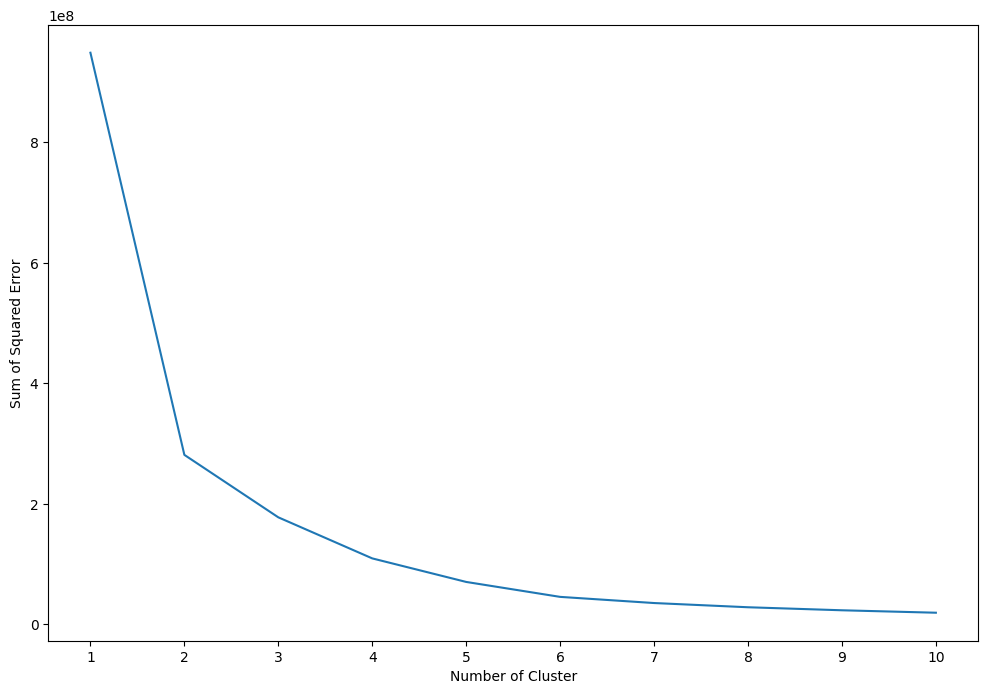

In [ ]:
# draw the SSE decline progression

import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Error')
plt.show()

In [ ]:
# run kmeans with optimal K

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# clusters' centroid analysis
# derive average of each feature (column)

fb_live['cluster'] = kmeans.labels_
centroid_df = fb_live.groupby('cluster')[['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','status_id']].agg({'num_reactions': 'mean', 'num_comments': 'mean', 'num_shares':'mean',
                                                                             'num_likes':'mean',
                                                                             'num_loves': 'mean', 'num_wows': 'mean', 'num_hahas':'mean',
                                                                             'num_sads': 'mean', 'num_angrys': 'mean','status_id':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'status_id':'num_status'})
centroid_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_status
0,0,91.96201,13.778431,1.801961,89.724265,1.285049,0.569363,0.185294,0.147059,0.047794,4080
1,1,1933.50000,59.442308,17.302885,1925.610577,4.586538,2.947115,0.298077,0.052885,0.004808,208


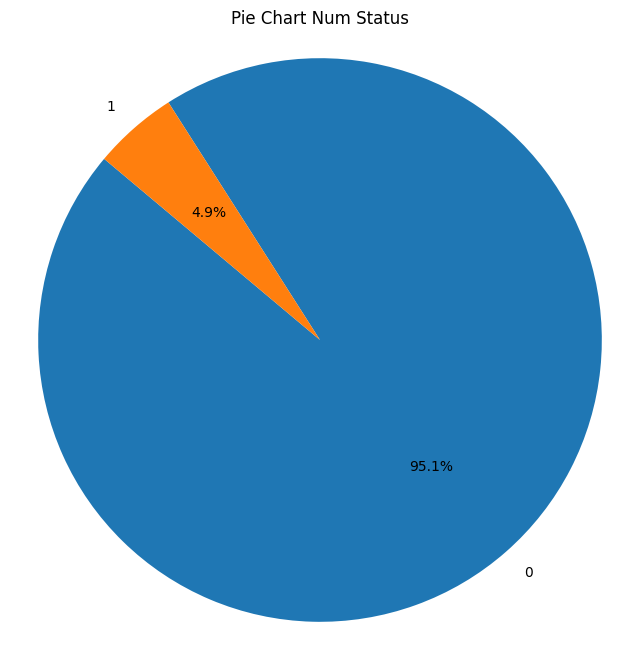

In [ ]:
cluster_labels = centroid_df['cluster'].unique()
num_status_values = centroid_df['num_status']

# Buat pie chart
plt.figure(figsize=(8, 8))  # Ukuran plot (opsional)
plt.pie(num_status_values, labels=cluster_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.title('Pie Chart Num Status')
plt.show()
